In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.isna().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# np.unique(df3['size'],return_counts=True)

In [15]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
def convert_tonum(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
convert_tonum('2166-2121')

2143.5

In [24]:
convert_tonum('34.466sq')

In [25]:
df4=df3.copy()

In [26]:
df4['total_sqft']=df4['total_sqft'].apply(convert_tonum)

In [27]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df4[~df4['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk


In [29]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [34]:
df5=df4.copy()

In [35]:
df5.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [37]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [38]:
df5['price_sqft']=df5['price']*100000/df5['total_sqft']

In [39]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [40]:
len(df5.location.unique())

1304

In [41]:
df5.location=df5.location.apply(lambda x: x.strip())

In [42]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [44]:
location_stats[:30]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Banashankari                 74
Hormavu                      74
Kengeri                      73
Ramamurthy Nagar             73
Name: location, dtype: int64

In [45]:


len(location_stats[location_stats<=10])

1052

In [46]:
location_less_than10=location_stats[location_stats<=10]

In [47]:
location_less_than10[:20]

location
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Naganathapura            10
Kalkere                  10
Nagadevanahalli          10
Nagappa Reddy Layout     10
Sadashiva Nagar          10
Gunjur Palya             10
Dairy Circle             10
Ganga Nagar              10
Dodsworth Layout         10
1st Block Koramangala    10
Chandra Layout            9
Jakkur Plantation         9
2nd Phase JP Nagar        9
Yemlur                    9
Mathikere                 9
Medahalli                 9
Volagerekallahalli        9
Name: location, dtype: int64

In [48]:
df5.location=df5.location.apply(lambda x: 'other ' if x in location_less_than10 else x)

In [49]:
df5.head(20)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [50]:
len(df5.location.unique())

242

In [51]:
df5.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
price_sqft    float64
dtype: object

In [52]:
df5[df5['total_sqft']/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [53]:
df6=df5[~(df5['total_sqft']/df5.bhk<300)]
df6.shape

(12502, 7)

In [55]:
df6.price_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

In [56]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [58]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_sqft)
        st=np.std(subdf.price_sqft)
        reduced_df=subdf[(subdf.price_sqft>(m-st))&(subdf.price_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [67]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [68]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


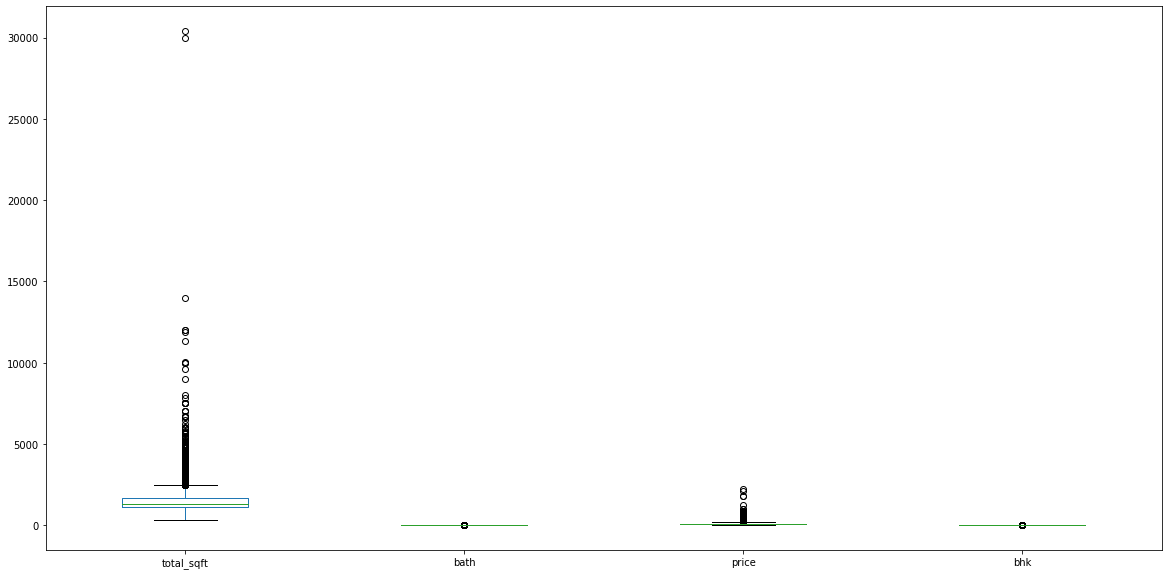

In [73]:
import seaborn as sns
(df7[['total_sqft','bath','price','bhk']]).plot.box()

In [75]:
df7.price_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_sqft, dtype: float64

In [74]:
df7.keys()

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'price_sqft'], dtype='object')

In [76]:
def plot_scatter_chart(df,location):
    matplotlib.rcParams['figure.figsize']=(15,10)
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    pl.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    pl.scatter(bhk3.total_sqft,bhk3.price,color='g',label='3BHK',s=50)
    pl.xlabel("Total squere feet Area")
    pl.ylabel("Price")
    pl.legend()
    pl.show()

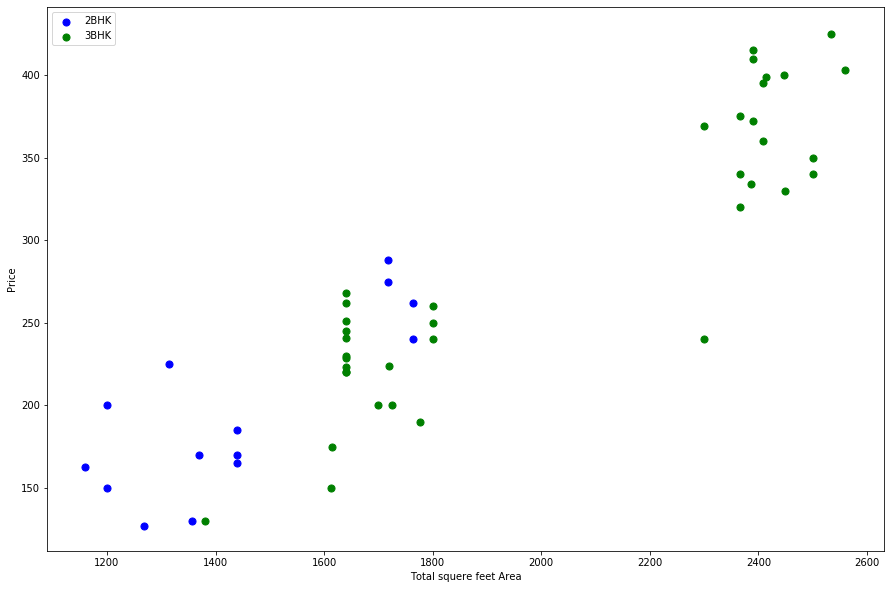

In [77]:
plot_scatter_chart(df7,'Rajaji Nagar')

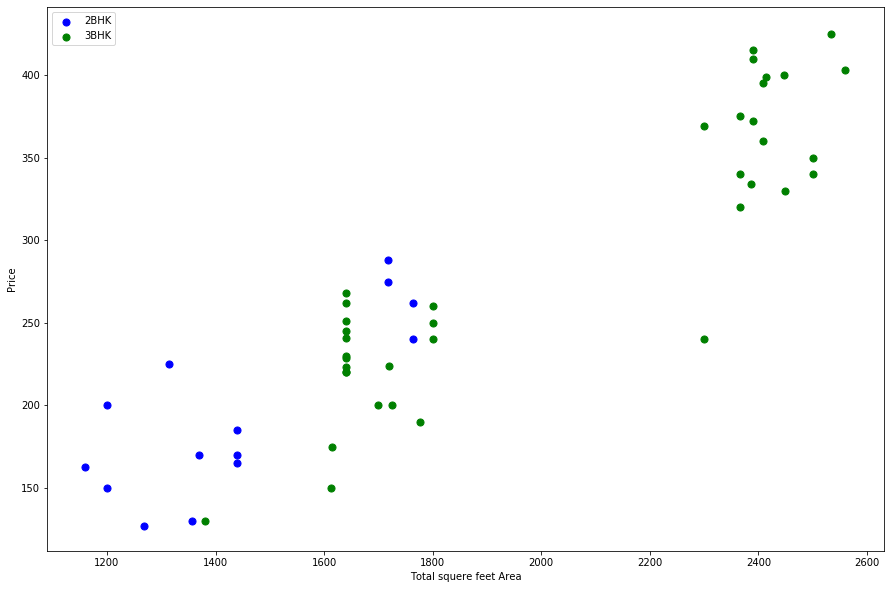

In [80]:
plot_scatter_chart(df7,'Rajaji Nagar')

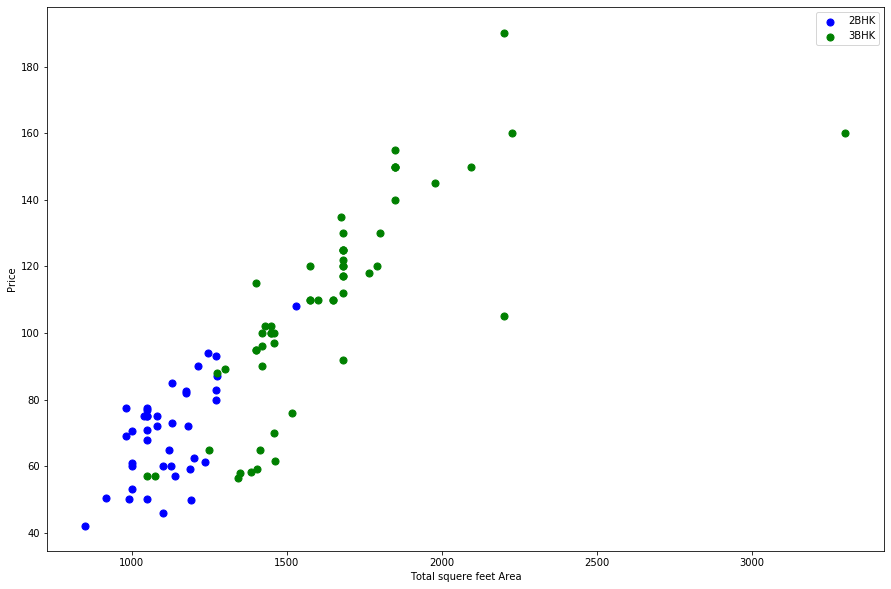

In [81]:
plot_scatter_chart(df7,'7th Phase JP Nagar')

In [ ]:
# for key,subdf in df6.groupby('location'):
#     print(key,subdf.shape)

In [108]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_sqft),
                'std':np.std(bhk_df.price_sqft),
                'count':bhk_df.shape[0]}
#             print(location)
#             print(bhk)
#             print(bhk_df)
#             print(bhk_stats)
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
#             print(location)
#             print(bhk)
#             print(bhk_df)
#             print('Status is:',stats)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 


In [76]:
# def remove_bhk_outlier(df):
#     exclude_indices=np.array([])
#     for location,location_df in df.groupby('location'):
# #         print(list(location_df.shape))
#         bhk_stats={}
#         for bhk,bhk_df in location_df.groupby('bhk'):
# #             print("Bhk",bhk_df.shape)
#             bhk_stats[bhk]={
#                 'mean':np.mean(bhk_df.price_sqft),
#                 'std':np.std(bhk_df.price_sqft),
#                 'count':bhk_df.shape[0]}
#         for bhk,bhk_df in location_df.groupby('bhk'):
#             stats=bhk_stats.get(bhk-1)
#             if stats and stats['count']>5:
#                 exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
#     return bhk_stats 


In [85]:
np.unique(df7['bhk'],return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16], dtype=int64),
 array([ 518, 4756, 4002,  745,  108,   62,   19,   16,    8,    3,    2,
           1,    1], dtype=int64))

In [109]:
remove_bhk_outlier(df7)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [108]:
list(df7.groupby('location'))

[('1st Block Jayanagar',
                location   size  total_sqft  bath  price  bhk    price_sqft
  0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4  15017.543860
  1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3  11901.840491
  2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3  12533.333333
  3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3  10833.333333
  4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2  11983.805668
  5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4  15018.181818
  6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4  15020.408163),
 ('1st Phase JP Nagar',
                location       size  total_sqft  bath  price  bhk    price_sqft
  7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   8849.557522
  8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   8906.666667
  9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   5666.666667
  10  1st Phase JP Na

In [110]:
df8=remove_bhk_outlier(df7)
df8.shape

(7329, 7)

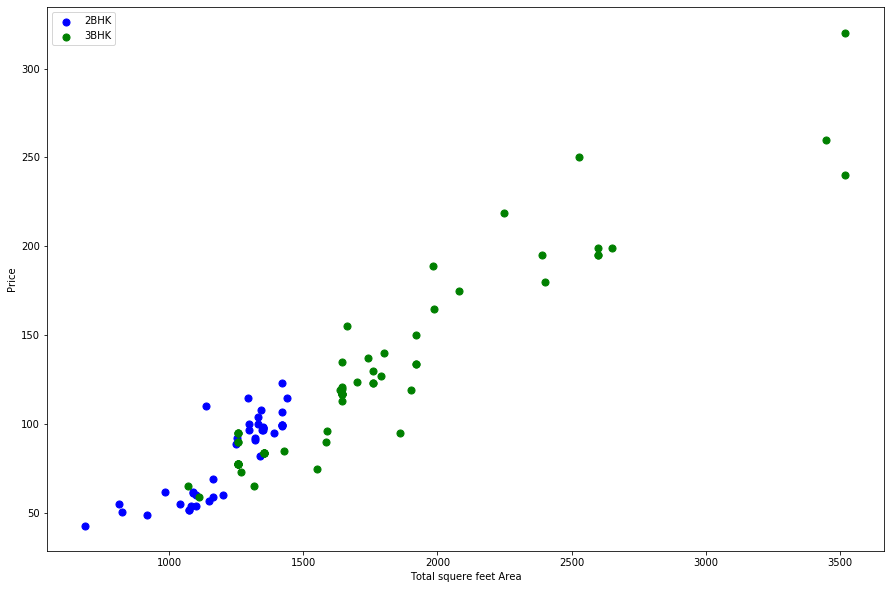

In [111]:
plot_scatter_chart(df7,'Hebbal')

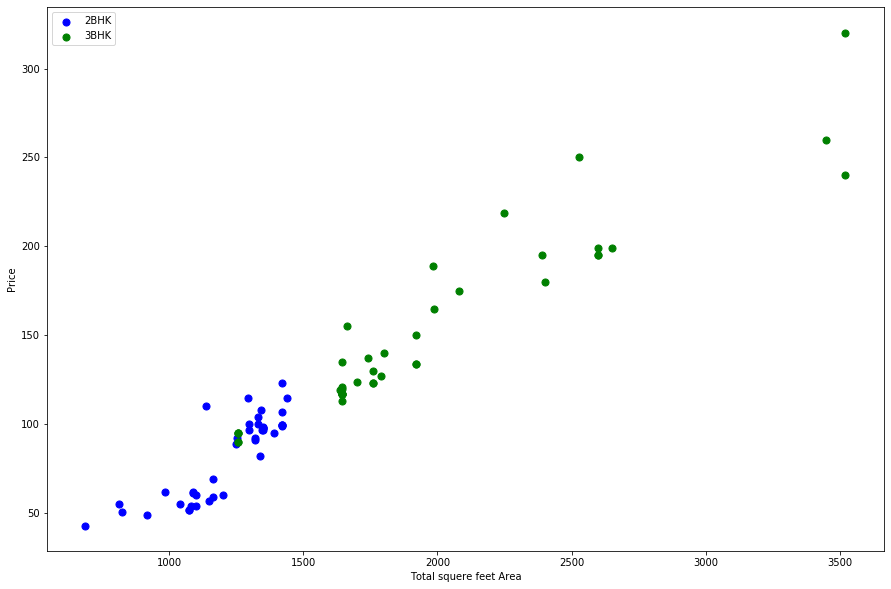

In [112]:
plot_scatter_chart(df8,'Hebbal')

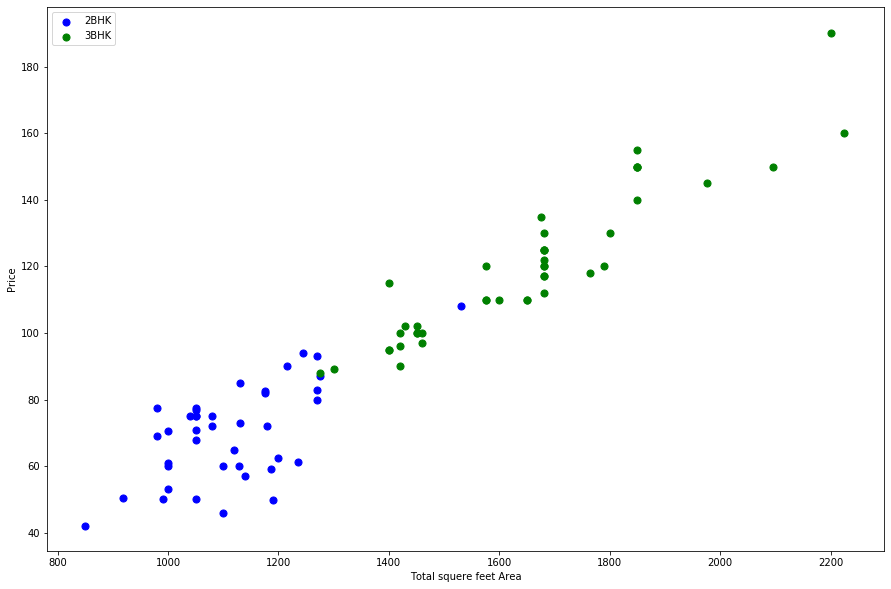

In [113]:
plot_scatter_chart(df8,'7th Phase JP Nagar')

In [114]:
loc=df7.groupby('location')

In [115]:
list(loc)

[('1st Block Jayanagar',
                location   size  total_sqft  bath  price  bhk    price_sqft
  0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4  15017.543860
  1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3  11901.840491
  2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3  12533.333333
  3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3  10833.333333
  4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2  11983.805668
  5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4  15018.181818
  6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4  15020.408163),
 ('1st Phase JP Nagar',
                location       size  total_sqft  bath  price  bhk    price_sqft
  7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   8849.557522
  8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   8906.666667
  9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   5666.666667
  10  1st Phase JP Na

In [116]:
df8.head(10)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


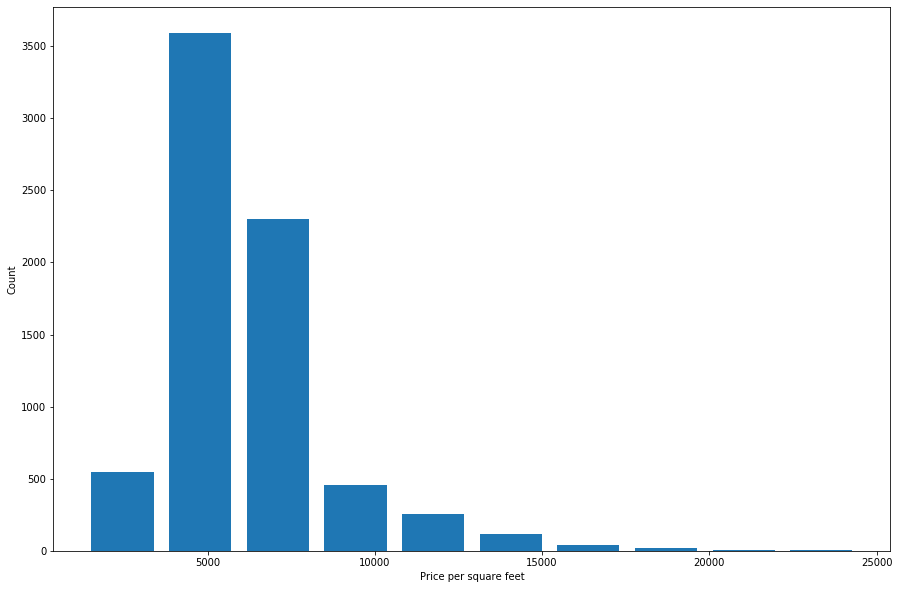

In [117]:
pl.hist(df8.price_sqft,rwidth=0.8)
pl.xlabel('Price per square feet')
pl.ylabel('Count')
pl.show()

In [118]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [119]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

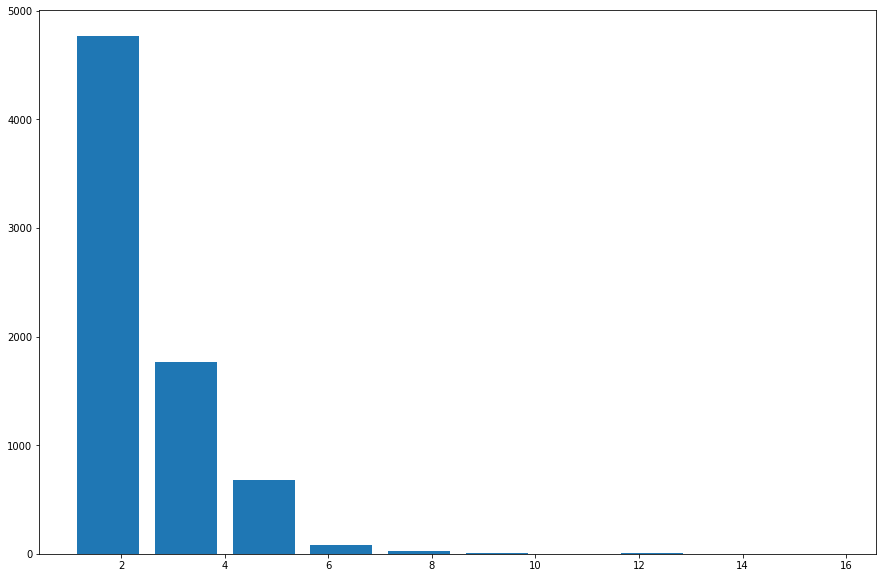

In [120]:
pl.hist(df8.bath,rwidth=0.8)

In [121]:
df9=df8[df8.bath<df8.bhk+2]

In [122]:
df9.shape

(7251, 7)

In [128]:
df10=df9.drop(['size','price_sqft'],axis=1)

In [129]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [124]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [125]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
dummies=dummies.drop("other ",axis=1)

In [134]:
dummies.columns

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [135]:
df11=pd.concat([df10,dummies],axis='columns')

In [136]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df11.shape

(7251, 246)

In [138]:
df12=df11.drop('location',axis=1)

In [141]:
# df12.to_csv('Cleaned.csv')

In [126]:
X=df12.drop('price',axis=1)

In [127]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
y=df12.price

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                    test_size=0.4,random_state=10)

In [130]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8731983204978733

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [146]:
def find_best_model(X,y):
    algos={'linear_regression':{
        'model':LinearRegression(),
        'params':{
            'normalize':[False,True]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
           'decision_tree':{
               'model':DecisionTreeRegressor(),
               'params':{
                   'criterion':['mse','friedman_mse'],
                   'splitter':['best','random']
               }
           }
        }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [152]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687430,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723922,"{'criterion': 'mse', 'splitter': 'best'}"


In [153]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [154]:
predict_price('1st Phase JP Nagar',1000,2,2)

86.989572342202

In [159]:
np.where(df12) 

(array([   0,    0,    0, ..., 7250, 7250, 7250], dtype=int64),
 array([0, 1, 2, ..., 1, 2, 3], dtype=int64))

In [160]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [177]:
np.zeros(len(X['2nd Phase Judicial Layout'])).size

7251

In [179]:
predict_price('Indira Nagar',1000,3,3)

186.26100860872677

In [198]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [200]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))